In [1]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.patches as patches
import sys
from matplotlib.collections import *
from matplotlib.image import imread
import drawing
import glob, os
import numpy as np

%load_ext autoreload
%autoreload 2 

In [2]:
def exec_cpp(dataset="graphviz", graph="badvoro", alpha=1, k=64, min_mvt=0.00001, max_iter=50, max_passes=30, scale_step=0.1, prime=1, res=0):
    src_root="../src"
    if(prime == -1):
        os.system(f"{src_root}/sordid datasets_txt/{dataset}/{graph}.txt {alpha} {k} {min_mvt} {max_iter} {max_passes} {scale_step} 0 {res}")
        os.system(f"{src_root}/sordid datasets_txt/{dataset}/{graph}.txt {alpha} {k} {min_mvt} {max_iter} {max_passes} {scale_step} 1 {res}")
    else:
        os.system(f"{src_root}/sordid datasets_txt/{dataset}/{graph}.txt {alpha} {k} {min_mvt} {max_iter} {max_passes} {scale_step} {prime} {res}")

def compil():
    src_root="../src"
    os.system(f"cd {src_root} && make")

def loadFromTxt(fname, N=None):
    if(N is not None):
        N = int(N)
        pos = np.zeros((N, 2))
        sizes = np.zeros((N, 2))
    polygons  = []
    with open(fname, "r") as f:
        first_line = f.readline()
        first_line_toks = first_line.split(" ")
        if(N is None):
            N = int(first_line_toks[0])
            pos = np.zeros((N, 2))
            sizes = np.zeros((N, 2))
        else:
            N = float(first_line_toks[0])
        i = 0
        for line in f.readlines():
            toks = line.split(" ")
            pos[i][0] = float(toks[0])
            pos[i][1] = float(toks[1])
            if len(toks)==4:
                sizes[i][0] = float(toks[2])
                sizes[i][1] = float(toks[3])
                polygons.append(np.array([[-sizes[i,0]/2,-sizes[i,1]/2],[-sizes[i,0]/2,sizes[i,1]/2],
                                            [sizes[i,0]/2,sizes[i,1]/2],[sizes[i,0]/2,-sizes[i,1]/2]]))
            else:
                n2 = int(toks[2])
                if n2==0:
                    if toks[3]=='1':
                        s = float(toks[4])
                        polygons.append(np.array([[-s,0],[0,s],[s,0],[0,-s]]))
                    elif toks[3]=='2':
                        s = float(toks[4])
                        polygons.append(np.stack([np.cos(np.linspace(0,2*np.pi)),np.sin(np.linspace(0,2*np.i))],-1)*s)
                else:
                    polygons.append(np.zeros((n2,2)))
                    for j in range(n2):
                        polygons[-1][j,0]=float(toks[3+j*2])
                        polygons[-1][j,1]=float(toks[3+j*2+1])            
                sizes[i][0] = 10
                sizes[i][1] = 10
            i+=1
            if(i == N):
                break
        f.close()
    return pos, sizes, N, polygons


pass 0 ; scale : 5.89236
pass 1 ; scale : 3.44618
pass 2 ; scale : 4.66927
pass 3 ; scale : 4.05773
pass 4 ; scale : 3.75196
pass 5 ; scale : 3.90484
pass 6 ; scale : 3.98128
pass 7 ; scale : 3.94306
save : datasets_txt/graphviz_shapes/star/badvoro.txt.sordidp
DONE; saved to datasets_txt/graphviz_shapes/star/badvoro.txt.sordidp


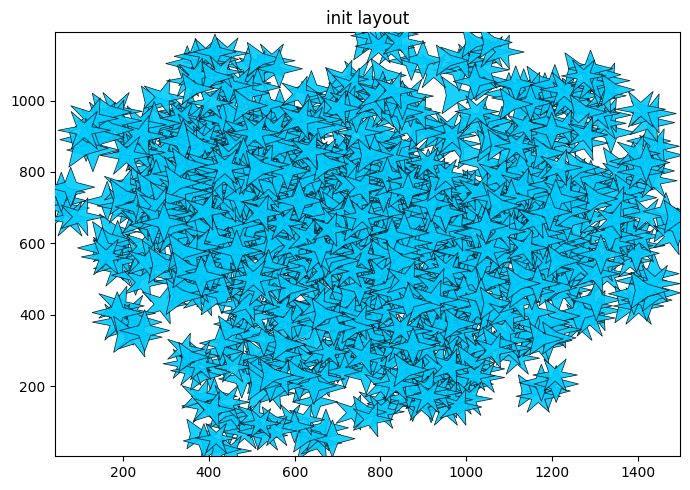

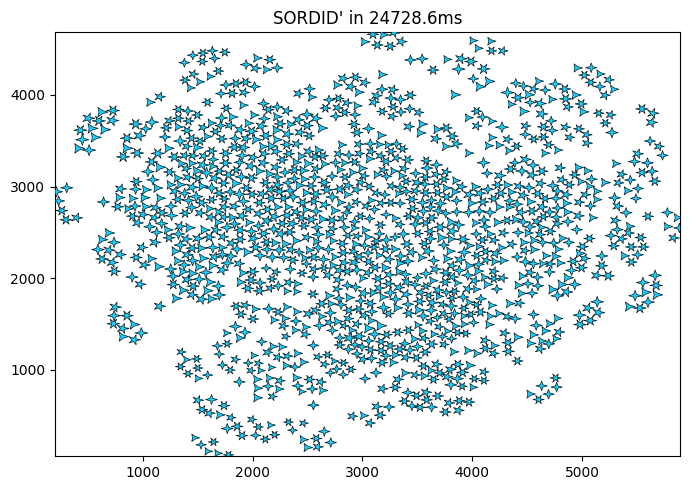

In [3]:
dataset = "graphviz_shapes/star"
graph = "badvoro"

prime = 1
extension = "sordidp" if prime==1 else "sordid"
isPrime_title = "'" if prime==1 else ""

exec_cpp(dataset, graph, prime=prime)

init_layout, init_sizes, N, init_polygons = loadFromTxt(f"./datasets_txt/{dataset}/{graph}.txt")
SORDID_layout, _, exec_time, SORDID_polygons = loadFromTxt(f"./datasets_txt/{dataset}/{graph}.txt.{extension}", N)

N = int(N)

drawing.draw(init_layout, init_sizes, polygons=init_polygons, edges=None, border_width=0.5, edge_width=1,  title="init layout")
plt.show()
drawing.draw(SORDID_layout, init_sizes, polygons=SORDID_polygons, edges=None, border_width=0.5, edge_width=1, title=f"SORDID{isPrime_title} in {exec_time}ms")
plt.show()
